In [1]:
!pip install -q darts

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!pip install -q matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.15.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt
import datetime

In [13]:
value = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
df = pd.DataFrame({'time':pd.date_range('20210101', periods=20), 'value': value})
df.head()

,time,value
0,2021-01-01,1
1,2021-01-02,3
2,2021-01-03,5
3,2021-01-04,7
4,2021-01-05,9


In [14]:
series = TimeSeries.from_dataframe(df,'time','value')

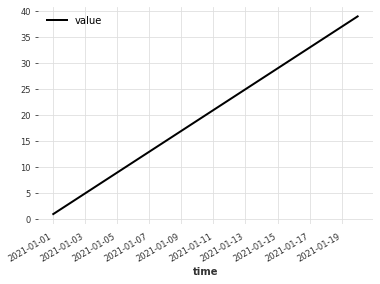

In [15]:
series.plot()

In [16]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('20210115'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [17]:
my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=2,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='univariate',
    log_tensorboard=True,
    random_state=42,
    training_length=5,
    input_chunk_length=4,
    force_reset=True
)

In [18]:
my_model.fit(train_transformed,
             verbose=True)

[2022-01-06 18:03:57,409] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
[2022-01-06 18:03:57,409] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
[2022-01-06 18:03:57,422] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-01-06 18:03:57,422] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 6/500 [00:00<00:18, 27.01it/s]

  3%|▎         | 15/500 [00:00<00:17, 28.35it/s]

  5%|▌         | 25/500 [00:00<00:17, 27.84it/s]

  7%|▋         | 34/500 [00:01<00:17, 27.16it/s]

  9%|▉         | 46/500 [00:01<00:16, 28.33it/s]

 11%|█         | 55/500 [00:01<00:15, 28.33it/s]

 13%|█▎        | 65/500 [00:02<00:14, 29.55it/s]

 15%|█▍        | 74/500 [00:02<00:14, 28.41it/s]

 17%|█▋        | 85/500 [00:03<00:14, 29.07it/s]

 19%|█▉        | 95/500 [00:03<00:13, 29.35it/s]

 21%|██        | 105/500 [00:03<00:13, 29.93it/s]

 23%|██▎       | 114/500 [00:03<00:13, 29.18it/s]

 25%|██▌       | 125/500 [00:04<00:12, 30.14it/s]

 27%|██▋       | 136/500 [00:04<00:12, 29.93it/s]

 29%|██▉       | 146/500 [00:05<00:12, 29.22it/s]

 31%|███       | 156/500 [00:05<00:11, 29.78it/s]

 33%|███▎      | 166/500 [00:05<00:11, 29.59it/s]

 35%|███▌      | 175/500 [00:06<00:11, 29.26it/s]

 37%|███▋      | 186/500 [00:06<00:10, 30.94it/s]

 39%|███▉      | 194/500 [00:06<00:10, 30.26it/s]

 41%|████      | 206/500 [00:07<00:09, 29.78it/s]

 43%|████▎     | 215/500 [00:07<00:09, 28.79it/s]

 45%|████▌     | 226/500 [00:07<00:09, 28.94it/s]

 47%|████▋     | 237/500 [00:08<00:08, 30.33it/s]

 49%|████▉     | 245/500 [00:08<00:08, 30.89it/s]

 51%|█████▏    | 257/500 [00:08<00:08, 30.15it/s]

 53%|█████▎    | 265/500 [00:09<00:07, 30.04it/s]

 55%|█████▌    | 277/500 [00:09<00:07, 30.20it/s]

 57%|█████▋    | 284/500 [00:09<00:07, 29.62it/s]

 59%|█████▉    | 296/500 [00:10<00:06, 30.46it/s]

 61%|██████    | 304/500 [00:10<00:06, 31.08it/s]

 63%|██████▎   | 316/500 [00:10<00:06, 30.19it/s]

 65%|██████▍   | 324/500 [00:11<00:05, 30.18it/s]

 67%|██████▋   | 336/500 [00:11<00:05, 30.82it/s]

 69%|██████▉   | 344/500 [00:11<00:05, 30.23it/s]

 71%|███████   | 356/500 [00:12<00:04, 30.28it/s]

 73%|███████▎  | 364/500 [00:12<00:04, 30.30it/s]

 75%|███████▌  | 376/500 [00:12<00:04, 29.97it/s]

 77%|███████▋  | 386/500 [00:13<00:03, 30.02it/s]

 79%|███████▉  | 397/500 [00:13<00:03, 31.14it/s]

 81%|████████  | 405/500 [00:13<00:03, 30.40it/s]

 83%|████████▎ | 417/500 [00:14<00:02, 30.52it/s]

 85%|████████▌ | 425/500 [00:14<00:02, 31.51it/s]

 87%|████████▋ | 433/500 [00:14<00:02, 30.71it/s]

 89%|████████▉ | 445/500 [00:15<00:01, 30.21it/s]

 91%|█████████▏| 457/500 [00:15<00:01, 31.54it/s]

 93%|█████████▎| 465/500 [00:15<00:01, 31.12it/s]

 95%|█████████▌| 477/500 [00:16<00:00, 30.97it/s]

 97%|█████████▋| 485/500 [00:16<00:00, 31.59it/s]

 99%|█████████▉| 497/500 [00:16<00:00, 32.09it/s]

100%|██████████| 500/500 [00:16<00:00, 29.81it/s]


In [19]:
predicted = my_model.predict(n=len(val_transformed))

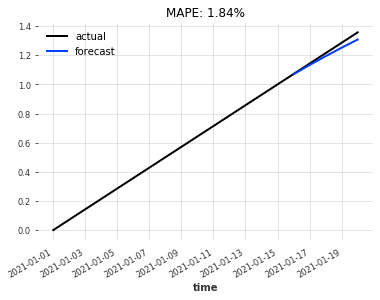

In [20]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()

In [21]:
transformer.inverse_transform(predicted)

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[30.95715259]],

       [[32.73320975]],

       [[34.41609486]],

       [[36.04946018]],

       [[37.62723151]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-01-16 2021-01-17 ... 2021-01-20
  * component  (component) object 'value'
Dimensions without coordinates: sample

In [22]:
val

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[31.]],

       [[33.]],

       [[35.]],

       [[37.]],

       [[39.]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-01-16 2021-01-17 ... 2021-01-20
  * component  (component) object 'value'
Dimensions without coordinates: sample